# Prosper Loans  and Interest Rates 
## by Ahmed Abdelhafez

## Investigation Overview

> In this investigation, I was interrested to study the factors the affects the loans' interest rates. The main focus was on the estimated return and loss, lender yield and the term of the loans.

## Dataset Overview

> The data set is huge with around 114,000 records of loans records with 81 features. I selected 11 features to study 2 of them are the features of interest and the other 9 are the main factors in my perspective that are looked at in any loan information

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
loans = loans[['Term', 'LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield'
,'EstimatedLoss','EstimatedReturn','IncomeRange'
,'Recommendations','Investors']]
loans['EstimatedEffectiveYield'].fillna(loans['EstimatedEffectiveYield'].mean(), inplace = True)
loans['EstimatedLoss'].fillna(loans['EstimatedLoss'].mean(), inplace = True)
loans['EstimatedReturn'].fillna(loans['EstimatedReturn'].mean(), inplace = True)
loans.drop_duplicates(inplace=True)
base_color = sb.color_palette()[0];

## Distribution of Interest Rates

<p> The distibution of the interest rates is more like a unimodal shape with a peak around 15%. Nonetheless, the most frequent interest value is around the 30% interest rates.</p>

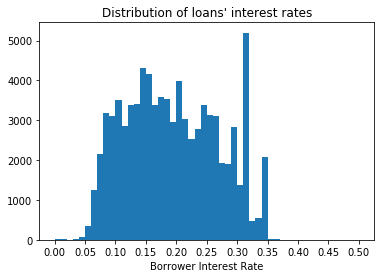

In [3]:
bins = np.arange(0, loans['BorrowerRate'].max()+0.01, 0.01)
plt.hist(loans['BorrowerRate'], bins = bins);
plt.xlabel('Borrower Interest Rate');
plt.title("Distribution of loans' interest rates");
ticks = np.arange(0, loans['BorrowerRate'].max()+0.05, 0.05)
labels = ['{:0.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

## Distribution of Borrower APR

<p> The distibution of the annual percentage rates is similar to the distribution of the interest rates with a peak around 15% and the most frequent interest value is around the 35%.</p>

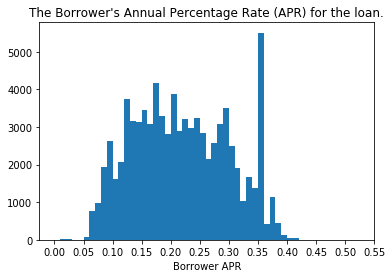

In [4]:
bins = np.arange(0, loans['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(loans['BorrowerAPR'], bins = bins);
plt.xlabel('Borrower APR');
plt.title("The Borrower's Annual Percentage Rate (APR) for the loan.");
ticks = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.05)
labels = ['{:0.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

## Borrower Rate and APR with different Loan Terms

> As we can see, the median rate increases the loan term increases with the highest median at 60. The max of 36 Term accounts for the highest rates with a few outliers.

> On the other hand, there is visible trend in the APR accross the Terms.

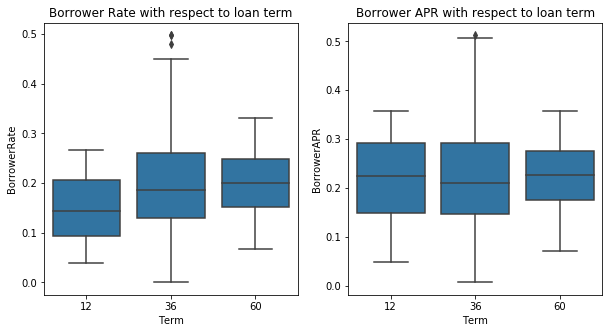

In [5]:
plt.figure(figsize = [10,5])
plt.subplot(1,2,1);
sb.boxplot(data = loans, x = 'Term', y = 'BorrowerRate', color = base_color);
plt.title('Borrower Rate with respect to loan term');
plt.subplot(1,2,2)
sb.boxplot(data = loans, x = 'Term', y = 'BorrowerAPR', color = base_color);
plt.title('Borrower APR with respect to loan term');

## Rate by EstimatedReturn for Selected Terms

> Higher returns correspond to higher rates in all three terms. However, the Term 60 is associated more with points close to the correlation line in opposite to points of other terms thet are more scattered and spaced.


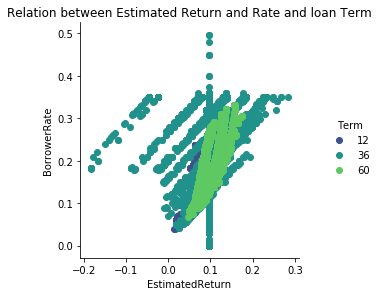

In [9]:
g = sb.FacetGrid(data = loans, hue = 'Term', height = 4,
                margin_titles = True, palette = 'viridis')
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerRate');
g.add_legend();
plt.title('Relation between Estimated Return and Rate and loan Term');